In [2]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [17]:
low_memory = True

reddit_df = pd.read_csv('d:/DataAnalytics/bitcoin_reddit_all.csv')
reddit_df['author'].count()

# DtypeWarning: Columns (0,1,2,3,4,8) have mixed types

Reddit_subset_df = reddit_df.head(10000)
reddit_df['date'] = pd.to_datetime(Reddit_subset_df['date'], format='%Y-%m-%d')

C:\Users\sharp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
Reddit_subset_df.head()

,Unnamed: 0,datetime,date,author,subreddit,created_utc,score,controversiality,body
6091,6091,2014-01-01 05:00:29,2014-01-01,dreppana,dogecoin,1.388552e+09,8.0,0.0,This is exactly what i was thinking whilst mak...
7259,7259,2014-01-01 20:04:02,2014-01-01,xrpcoin,Bitcoin,1.388607e+09,1.0,0.0,His arguments are completely filled with error...
2180,2180,2014-01-01 22:10:37,2014-01-01,bitcoinjohnny,BitcoinMarkets,1.388614e+09,1.0,0.0,Of course it's gambling. It's hard to believe ...
2532,2532,2014-01-01 21:48:11,2014-01-01,SatoshiKamasutra,Bitcoin,1.388613e+09,4.0,0.0,I'm afraid that you're right. People who say ...
6313,6313,2014-01-01 01:55:38,2014-01-01,OpBeta,leagueoflegends,1.388541e+09,1.0,0.0,How is that the other way around? And you can ...


In [14]:
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
# df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)

Reddit_subset_df['date'] = pd.to_datetime(Reddit_subset_df['date'], format='%Y-%m-%d')

Reddit_subset_df = Reddit_subset_df.sort_values(['date'])
Reddit_subset_groupby_df = Reddit_subset_df.groupby(pd.Grouper(key='date',freq='1W'))
Reddit_subset_groupby_df.count()


,Unnamed: 0,datetime,author,subreddit,created_utc,score,controversiality,body
date,,,,,,,,
2014-01-05,98,98,98,98,98,98,98,98
2014-01-12,196,196,196,196,196,196,196,196
2014-01-19,200,200,200,200,200,200,200,200
2014-01-26,225,225,225,225,225,225,225,225
2014-02-02,226,226,226,226,226,226,226,226
2014-02-09,277,277,277,277,277,277,277,277
2014-02-16,278,278,278,278,278,278,278,278
2014-02-23,236,236,236,236,236,236,236,236
2014-03-02,348,348,348,348,348,348,348,348


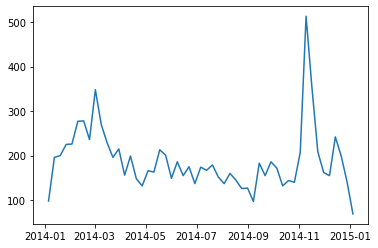

In [16]:
plt.plot(Reddit_subset_groupby_df['author'].count())

In [18]:
reddit_df = reddit_df.sort_values(['date'])
reddit_groupby_df = reddit_df.groupby(pd.Grouper(key='date',freq='1W'))

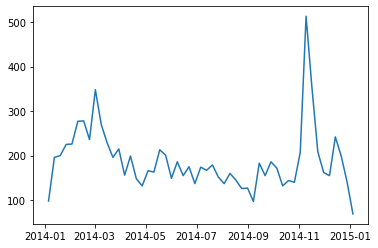

In [19]:
plt.plot(reddit_groupby_df['author'].count())